In [38]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm #最小二乘
from statsmodels.formula.api import ols #加载ols模型

D:\anaconda_3.7\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [39]:
# 读入 ad_result（关于某游戏在电视盒杂志上投入的广告费和所获得的新用户数的信息）数据
ad_result_table = pd.read_csv('./data/ad_result.csv')
ad_result_table.head()

,month,tvcm,magazine,install
0,2013-01,6358,5955,53948
1,2013-02,8176,6069,57300
2,2013-03,6853,5862,52057
3,2013-04,5271,5247,44044
4,2013-05,6473,6365,54063


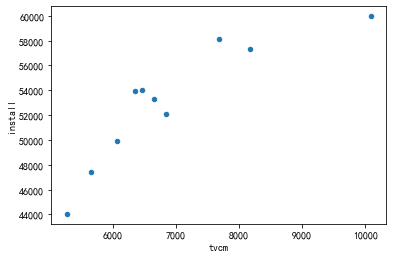

In [40]:
# 查看电视广告费和新用户数的散点图
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

ad_result_table.plot(kind='scatter', x='tvcm', y='install')

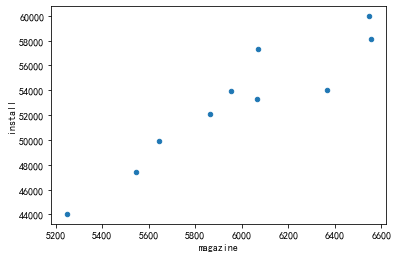

In [41]:
# 查看杂志广告费和新用户数的散点图
ad_result_table.plot(kind='scatter', x='magazine', y='install')

In [42]:
# 进行多元回归分析（sklearn）
X = ad_result_table[['tvcm','magazine']].as_matrix()
y = ad_result_table[['install']].as_matrix()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
print('Coefficients:%s,intercept %.2f' % (reg.coef_, reg.intercept_))#权重向量即为每个特征的相关系数
print("Residual sum of square:%.2f" % np.mean((reg.predict(X_test) - y_test) ** 2))#均方误差，每个特征的（预测值-真实值的平方）的平均值
print('Score:%.2f' % reg.score(X_test, y_test))#得分


Coefficients:[[0.96776884 8.82567022]],intercept -6389.96
Residual sum of square:1440974.25
Score:0.50


D:\anaconda_3.7\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\anaconda_3.7\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
# 进行多元回归分析（statsmodels）
lm=ols('install ~ tvcm + magazine',data=ad_result_table).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                install   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     52.86
Date:                Sun, 19 Jul 2020   Prob (F-statistic):           5.97e-05
Time:                        15:09:51   Log-Likelihood:                -84.758
No. Observations:                  10   AIC:                             175.5
Df Residuals:                       7   BIC:                             176.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    188.1743   7719.131      0.024      0.981   -1.81e+04    1.84e+04
tvcm           1.3609      0.517      2.630      0.034       0.137       2.584
magazine       7.2498      1.693      4.283      0.004       3.247      11.252
==============================================================================
Omnibus:                        0.992   Durbin-Watson:                   0.881
Prob(Omnibus):                  0.609   Jarque-Bera (JB):                0.795
Skew:                           0.534   Prob(JB):                        0.672
Kurtosis:                       2.124   Cond. No.                     1.63e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""